# Machine Learning and Neural Networks Midterm CM3015

This dataset (originally from the Spotify API but downloaded from Kaggle) can be accessed [here](https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data?select=taylor_swift_spotify.csv).

In [2]:
# Using pandas to pre-process and load the dataset
import pandas as pd
# Use this to create own classifier
import numpy as np
# Visualization library
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('taylor_swift_spotify.csv')
df.head(3)
df.shape

(530, 18)

The main problem with this dataset with respect to the aim of this project (to evaluate and compare the performance of different classifiers and the same classifiers using different hyperparameters when trying to classify each song into which album it belongs to) is that there are multiple re-releases of the same album. For instance, here we can see all of the albums which are a very similar version of the '1989' album:

In [3]:
# As we can see here, there are 75 rows/songs which belong to an album which contains the name '1989'
print(f"Nr of songs in an album which is some version of 1989: {len(df[df['album'].str.contains('1989')])}")
# And the unique list of album names which are some version of '1989' --> there are three albums with very similar songs on them.
print(f"Versions of album '1989': {df[df['album'].str.contains('1989')]['album'].unique()}")

Nr of songs in an album which is some version of 1989: 75
Versions of album '1989': ["1989 (Taylor's Version) [Deluxe]" "1989 (Taylor's Version)"
 '1989 (Deluxe Edition)' '1989']


It is easy to imagine how having 3 or 4 instances/re-releases of the same album but only one version of another particular album could make it difficult for the classifier to differentate between different albums, if they contain the same songs with very slight musical differences between them. Furthermore, this can lead to high variance and overfitting, because the algorithm might pick out patterns which represent the very slight differences between the different releases of the same album, rather than the general differences between albums. One solution to this problem is to rename the different versions of the same album all so they have the same title. However, this will create an imbalance in the training data, as some albums (which have been re-released several times) will be over-represented, whereas some albums which have not had a special release yet, such as the debut 'Taylor Swift' album will be under-represented. [This](https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2#:~:text=A%20simple%20way%20to%20fix,one%20class%20or%20the%20other.) article discusses some of the issues with imbalanced classes, such as diminished recall of the less-represented classes. As such, using techniques such as cross-validation on folds with randomly-selected indices is really essential here to ensure that the least-represented classes get trained on. Additionally, as the article cited above points out, the model really needs to be evaluted in terms of recall rather than just accuracy here, to ensure that it picks up on the rarer album instances. Finally, it will be interesting to compare different classification models (K-Nearest Neighbour, Naive Bayes and Decision Trees) to see which performs best on imbalanced data. We will evaluate which of these models has better performance in terms of recall (the rate of being able to identify songs which positively belong to an album).


In [8]:
# Set all albums which are a version of the same album to have the same 'album' name in the DataFrame, using the 'replace' method
# First get list of distinct album names
df['album'].unique() 

array(['1989', 'Speak Now', 'Midnights', 'Red', 'Fearless', 'evermore',
       'folklore', 'Lover', 'reputation',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

In [9]:
# 1. Replace all 1989 versions with only '1989'
# Boolean mask: get true-false array depending on whether 'album' contains sub-string '1989'
mask1 = df['album'].str.contains('1989') 
df.loc[mask1, 'album'] = '1989'

In [10]:
# 2. Do this for the other albums with duplicated versions
mask2 = df['album'].str.contains('Midnights')
df.loc[mask2, 'album'] = 'Midnights'
mask3 = df['album'].str.contains('Red')
df.loc[mask3, 'album'] = 'Red'
mask4 = df['album'].str.contains('Speak Now')
df.loc[mask4, 'album'] = 'Speak Now'
mask5 = df['album'].str.contains('folklore')
df.loc[mask5, 'album'] = 'folklore'
mask6 = df['album'].str.contains('Fearless')
df.loc[mask6, 'album'] = 'Fearless'
mask7 = df['album'].str.contains('reputation')
df.loc[mask7, 'album'] = 'reputation'
mask8 = df['album'].str.contains('evermore')
df.loc[mask8, 'album'] = 'evermore'

In [11]:
# Now compare the album names: much simpler!
df['album'].unique() 

array(['1989', 'Speak Now', 'Midnights', 'Red', 'Fearless', 'evermore',
       'folklore', 'Lover', 'reputation',
       'Live From Clear Channel Stripped 2008', 'Taylor Swift'],
      dtype=object)

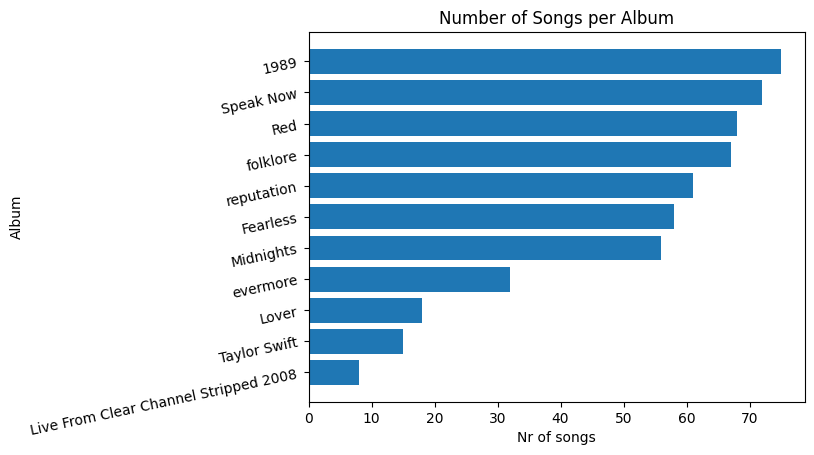

In [14]:
# Print out how many songs in each album
# It is clear that evermore and Taylor Swift debut album are underrepresented
# 'Live From Clear Channel Stripped 2008' is a compilation of songs from different albums, so it doesn't overrepresent one particular album
album_song_counts = df.groupby('album').size().reset_index(name='nr of songs').sort_values(by='nr of songs')
# Create a horizontal bar chart using matplotlib with albums on y-axis and song counts on the x-axis
plt.barh(album_song_counts['album'], album_song_counts['nr of songs'])
# Add axes labels
plt.ylabel('Album')
plt.xlabel('Nr of songs')
plt.title('Number of Songs per Album')
# Rotate the labels on the y-axis (Albums) so easier to read them
plt.yticks(rotation=12)
plt.show()

In [17]:
df.to_csv('taylor_swift_processed.csv', index=False)